In [174]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [175]:
data = pd.Series([.25,.5,.75,1.])

In [176]:
data.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

In [177]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [178]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [179]:
area_dict = {'California': 4,'Georgia':77, 'Texas': 5, "New York": 8, "Florida": 10, "Illinois": 2}
area = pd.Series(area_dict)
states = pd.DataFrame({'population': population,'area':area})
print states
states = states.stack()
print '\n\n'
print states

            area  population
California     4  38332521.0
Florida       10  19552860.0
Georgia       77         NaN
Illinois       2  12882135.0
New York       8  19651127.0
Texas          5  26448193.0



California  area                 4.0
            population    38332521.0
Florida     area                10.0
            population    19552860.0
Georgia     area                77.0
Illinois    area                 2.0
            population    12882135.0
New York    area                 8.0
            population    19651127.0
Texas       area                 5.0
            population    26448193.0
dtype: float64


In [181]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [182]:
df = pd.DataFrame(rng.randint(0,10,(3,4)),
                 columns=['A','B','C','D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [183]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [184]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [185]:
a = np.full((5,3),8, dtype='float')
df = pd.DataFrame(a,index=['a', 'c', 'e', 'f', 'h'], columns=['A','B','C'])
df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df['A'] = df['A'] * 3
df['B'] = df['B'] * 2
print df

# df.fillna(df.mean(),inplace=True)
print df.dropna()

      A     B    C
a  24.0  16.0  8.0
b   NaN   NaN  NaN
c  24.0  16.0  8.0
d   NaN   NaN  NaN
e  24.0  16.0  8.0
f  24.0  16.0  8.0
g   NaN   NaN  NaN
h  24.0  16.0  8.0
      A     B    C
a  24.0  16.0  8.0
c  24.0  16.0  8.0
e  24.0  16.0  8.0
f  24.0  16.0  8.0
h  24.0  16.0  8.0


In [186]:
a = np.array([1,2,3,None])
b = np.array([1,2,3, np.nan])

# print a.sum()
print b.sum()

nan


In [187]:
pop = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
u18 = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
u18['%'] = u18.under18 / u18.total
u18

,total,under18,%
0,33871648,9267089,0.273594
1,37253956,9284094,0.249211
2,18976457,4687374,0.247010
3,19378102,4318033,0.222831
4,20851820,5906301,0.283251
5,25145561,6879014,0.273568


In [188]:
pop = pd.read_csv('notebooks/data/state-population.csv')
areas = pd.read_csv('notebooks/data/state-areas.csv')
abbrevs = pd.read_csv('notebooks/data/state-abbrevs.csv')

print pop[0:5]
print areas[0:5]
print abbrevs[0:5]

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [189]:
merged = pd.merge(pop, abbrevs, how='outer', 
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1)

merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rica'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'USA'
merged.isnull().any()
merged.head()



,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [190]:
final = pd.merge(merged, areas, on='state')
data2010 = final.query("year == 2010 & ages == 'total'")
data2010 = data2010['population'].sort_values(ascending=True)
data2010


2405      564222.0
389       605125.0
2202      625793.0
1637      674344.0
91        713868.0
2010      816211.0
379       899711.0
1253      990527.0
1914     1052669.0
1434     1316614.0
954      1327366.0
570      1363731.0
581      1570718.0
1338     1829838.0
2309     1854146.0
1530     2064982.0
1349     2703230.0
2117     2774424.0
773      2858910.0
189      2922280.0
1157     2970047.0
762      3050314.0
293      3579210.0
1733     3759263.0
1818     3837208.0
858      4347698.0
869      4545392.0
1925     4636361.0
3        4785570.0
283      5048196.0
1146     5310337.0
2394     5689060.0
965      5787193.0
1242     5996063.0
2021     6356683.0
101      6408790.0
677      6489965.0
1050     6563263.0
2298     6742256.0
2213     8024417.0
1445     8802707.0
1626     9559533.0
485      9713248.0
1061     9876149.0
1722    11545435.0
1829    12710472.0
666     12839695.0
475     18846054.0
1541    19398228.0
2106    25245178.0
197     37333601.0
Name: population, dtype: float6

In [191]:
import seaborn as sns
planets = sns.load_dataset('planets')
# print planets.shape
planets.head()
a = planets.groupby('method')['year'].count()
print a.sum()

1035


In [194]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [211]:
# print titanic.shape
# print titanic.sex.isnull().any()
# print titanic.groupby('sex')[['survived']].mean()
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [212]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [222]:
a = pd.DataFrame(np.random.randint(5, size=(10,3)),columns=['A','B','D'])
pd.cut(a['A'],[0,5,10])
# print a
# print b

0    (0, 5]
1    (0, 5]
2    (0, 5]
3    (0, 5]
4    (0, 5]
5    (0, 5]
6    (0, 5]
7    (0, 5]
8    (0, 5]
9       NaN
Name: A, dtype: category
Categories (2, object): [(0, 5] < (5, 10]]

In [224]:
from pandas_datareader import data

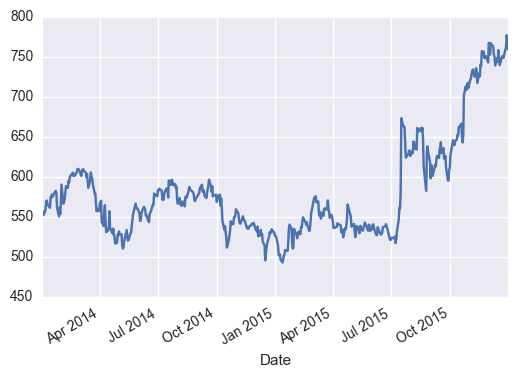

In [228]:
goog = data.DataReader('GOOG', start='2014', end='2016', data_source='google')
goog['Close'].plot()

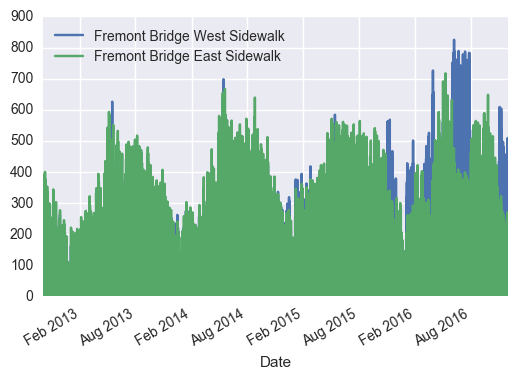

In [244]:
data = pd.read_csv("bike.csv", index_col='Date', parse_dates=True)
data.head()
data.plot();

In [245]:
data.columns
data.columns = ['West','East']
data['Total'] = data.West + data.East


In [247]:
data.dropna().describe()

,West,East,Total
count,36472.000000,36472.000000,36472.000000
mean,62.014203,54.120915,116.135117
std,83.538845,77.301949,145.918364
min,0.000000,0.000000,0.000000
25%,8.000000,7.000000,16.000000
50%,33.000000,28.000000,65.000000
75%,80.000000,67.000000,151.000000
max,825.000000,717.000000,1186.000000
